In [ ]:
from google.colab import drive

In [ ]:
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.getcwd()

'/content'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()

In [ ]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
X = pd.DataFrame(housing.data, columns = housing.feature_names)

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y = pd.DataFrame(housing.target, columns = ['target'])

In [ ]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [ ]:
X.shape

(20640, 8)

In [ ]:
y.shape

(20640, 1)

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, random_state = 42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)

In [ ]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(15480, 8)
(5160, 8)
(11610, 8)
(3870, 8)


In [ ]:
X_train.shape[1]

8

In [ ]:
X_train.shape[1:]

(8,)

In [ ]:
LAYERS = [
    tf.keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
]

In [ ]:
model = tf.keras.models.Sequential(LAYERS)

In [ ]:
LOSS = "mse"
OPTIMIZER = "sgd"

model.compile(optimizer = OPTIMIZER, loss = LOSS)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 701 (2.74 KB)
Trainable params: 701 (2.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
x_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
EPOCHS = 20

history = model.fit(X_train,y_train, epochs = EPOCHS, validation_data = (X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 5s 7ms/step - loss: 0.7282 - val_loss: 326.6737
Epoch 2/20
363/363 [==============================] - 2s 7ms/step - loss: 0.4212 - val_loss: 589.5239
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3887 - val_loss: 955.3619
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3814 - val_loss: 17234.7227
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3725 - val_loss: 2649.5046
Epoch 6/20
363/363 [==============================] - 3s 8ms/step - loss: 0.3572 - val_loss: 2017.6521
Epoch 7/20
363/363 [==============================] - 3s 8ms/step - loss: 0.3491 - val_loss: 2295.7329
Epoch 8/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3436 - val_loss: 8778.8818
Epoch 9/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3390 - val_loss: 3709.0510
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 

In [ ]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.728236,326.673706
1,0.421152,589.523865
2,0.388713,955.361877
3,0.381355,17234.722656
4,0.372516,2649.504639
5,0.357168,2017.652100
6,0.349050,2295.732910
7,0.343551,8778.881836
8,0.339036,3709.051025
9,0.335193,3327.512939


<Axes: >

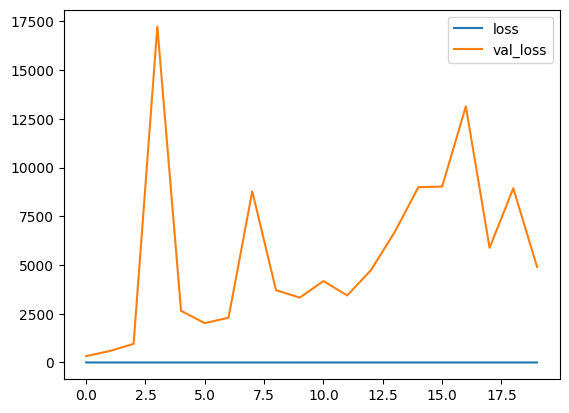

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 1s 6ms/step - loss: 0.3139


0.3139225244522095

In [ ]:
X_test.shape

(5160, 8)

In [ ]:
new = X_test[0]

In [ ]:
new.shape

(8,)

In [ ]:
X_test[0]

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [ ]:
new.reshape((1,8)).shape

(1, 8)

In [ ]:
model.predict(new.reshape((1,8)))

1/1 [==============================] - 0s 110ms/step


array([[0.5312519]], dtype=float32)